In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print("Setup Complete")

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
Setup Complete


# Steps to be followed to solve this problem
1. **Data Exploration**

**1.Data Exploration**

In [2]:
#reading the data
import pandas as pd
data_train = pd.read_csv('/kaggle/input/titanic/train.csv', index_col="PassengerId")
data_test = pd.read_csv('/kaggle/input/titanic/test.csv',index_col="PassengerId")

print("code executed")

code executed


In [3]:
#viewing the columns
data_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#summary of data
data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#vieweing the data
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Categorical columns in the training data
object_cols = [col for col in data_train.columns if data_train[col].dtype == "object"]
num_cols = [col for col in data_train.columns if data_train[col].dtype != "object"]
print(f"The objects of the data are:")
print("\n",object_cols)
print(f"\nThe numerics of the data are:")
print("\n",num_cols)

The objects of the data are:

 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

The numerics of the data are:

 ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [7]:
#summarising the columns with missing data
# Shape of training data (num_rows, num_columns)
print(data_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (data_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
print("\nMissing Data by percentage")


(891, 11)
Age         177
Cabin       687
Embarked      2
dtype: int64

Missing Data by percentage


**Report on initiall data exploration**

* We want to predict the survived column (y) using the rest of the colums (x)
* Most of the people on board were young, 75% below 35 years
* Roughly 25% of the people survived
* Half of the people were in p class 3(the cheapest)
* 75% were traveling alone, no spouse, sibling or parent
* Ticket is an alphanumeric variable, will be dropped
* Cabin has more than half of its data missing, will be dropped
* Name will be dropped, too many uniqiue values, no correlation

**************VALUES TO DROP**************
* Ticket
* Cabin
* Name

**************VALUES TO CONVERT TO NUMS**************
* Sex
* Embarked



In [8]:
#Drop the values to drop
bad_label_cols = ["Ticket", "Cabin", "Name"]
data_train = data_train.drop(bad_label_cols, axis=1)
data_test = data_test.drop(bad_label_cols, axis=1)
combined_df = data_train.copy()
data_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


**Naming our target and features**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Remove rows with missing target, separate target from predictors
y = data_train['Survived']
X = data_train[['Sex',
                'Embarked',
                'Pclass', 
                'Age', 
                'SibSp', 
                'Parch', 
                'Fare']]


# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)
print("Code Executed")

Code Executed


**Preprocessing the data**

1. OrdinalEncoding
2. Imputation

**1. Ordinal Encoding**

In [10]:
from sklearn.preprocessing import OrdinalEncoder
#defining cols that will undergo ordinal transformation
good_label_cols = ['Sex', 'Embarked']
# Apply ordinal encoder 
ordinal_encoder = OrdinalEncoder()
X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])
X_valid[good_label_cols] = ordinal_encoder.transform(X_valid[good_label_cols])
print("Code Executed")

Code Executed


**2. Imputation**

In [11]:
from sklearn.impute import SimpleImputer

# Fill in the lines below: imputation
my_imputer = SimpleImputer() # Your code here
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Fill in the lines below: imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns
print("Code Executed")

Code Executed


**Function for calculating MAE**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid, n_estimators):
    model = RandomForestClassifier(n_estimators, max_depth = 10,random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)
print("Code Executed")

Code Executed


In [13]:
#Looking at the data after evrything has been done
X_train = imputed_X_train
X_valid = imputed_X_valid
X_train.head()

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,0.0,0.0,3.0,29.745184,0.0,2.0,15.2458
1,1.0,2.0,2.0,31.000000,0.0,0.0,10.5000
2,1.0,0.0,2.0,31.000000,1.0,1.0,37.0042
3,1.0,0.0,3.0,20.000000,0.0,0.0,4.0125
4,1.0,2.0,3.0,21.000000,0.0,0.0,7.2500


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


<AxesSubplot:>

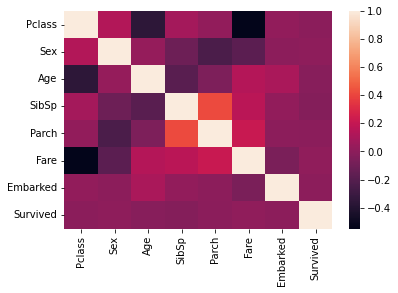

In [14]:
#viewing correlation between data point
import seaborn as sns
import matplotlib.pyplot as plt
#brnging back the combined df to work wth to view the correlation
combined_df = combined_df.drop("Survived", axis=1)
combined_df[good_label_cols] = ordinal_encoder.transform(combined_df[good_label_cols])
imputed_combined_df = pd.DataFrame(my_imputer.transform(combined_df))
imputed_combined_df.columns = combined_df.columns
imputed_combined_df["Survived"] = data_train["Survived"]
imputed_combined_df["Survived"][0] = 0
imputed_combined_df.corr()
sns.heatmap(imputed_combined_df.corr())

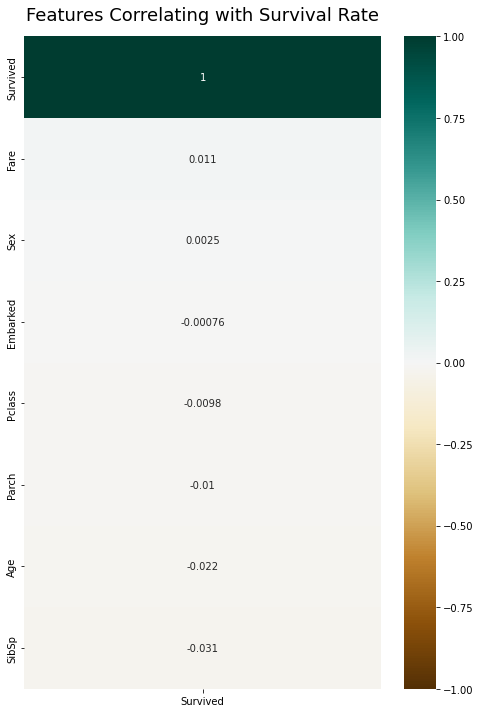

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(imputed_combined_df.corr()[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Survival Rate', fontdict={'fontsize':18}, pad=16);

**Observations**

Very little correlation between features and the target

**Fitting and training**

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
print(score_dataset(X_train, X_valid, y_train, y_valid, 1))
print(score_dataset(X_train, X_valid, y_train, y_valid, 5))
print(score_dataset(X_train, X_valid, y_train, y_valid, 25))
print(score_dataset(X_train, X_valid, y_train, y_valid, 50))
print(score_dataset(X_train, X_valid, y_train, y_valid, 100))
print(score_dataset(X_train, X_valid, y_train, y_valid, 500))
print(score_dataset(X_train, X_valid, y_train, y_valid, 5000))

0.2011173184357542
0.16201117318435754
0.17318435754189945
0.16201117318435754
0.1564245810055866
0.15083798882681565
0.1564245810055866


Best N-estimators = 5.

**Final Part**

* Fit
* Predict

In [17]:
#fit the model
my_model = RandomForestClassifier(n_estimators=500, max_depth = 10, random_state=0)
my_model.fit(X_train,y_train)
print("Code Executed")

Code Executed


In [18]:
#validation prediction
val_pred = my_model.predict(X_valid)
print("Code Executed")

Code Executed


**Vieweing the predictions**

In [19]:
val_pred[:50]

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0])

We had said earlier that around 25% people survived, lets see if the predictions suggest that...

In [20]:
sum = 0
val_count = 0
for i in val_pred:
    sum+=i
    val_count+=1
survival_rate_pred = (sum/val_count)*100
print(f'There are {val_count} values in total predicted\n')
print(f'Survivors predicted is {survival_rate_pred:.2f}%')
    

There are 179 values in total predicted

Survivors predicted is 33.52%


Doing the same for other factors the numbers from data are as follows:

* 37% Survival rate
* 61% the percentage of First Class passengers who survived.
* 42% the percentage of Standard Class passengers who survived.
* 24% the percentage of Third Class passengers who survived.
* 74% woman survived.
* 52% Children. (<18)
* 20% male.

In [21]:
#creating a function for this
#create a function that takes as input, the column we want the % of and the values in that column
def per_per_grp(col,col_val):
    global X_valid_copy
    X_valid_copy = X_valid.copy()
    X_valid_copy["Predictions"] = val_pred
    #get name of indexes we ae looking for
    index_names = X_valid_copy[X_valid_copy[col] != col_val].index
    #drop these row from the df
    X_valid_copy.drop(index_names,inplace=True)
    print(f"DataFrame has been updated based, new df name: X_valid_copy")
print("Code Executed")

Code Executed


In [22]:
#calling the function
per_per_grp("Sex",1)

DataFrame has been updated based, new df name: X_valid_copy


In [23]:
#viewing the new df
X_valid_copy.head()

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare,Predictions
0,1.0,0.0,3.0,29.745184,0.0,0.0,14.4583,0
1,1.0,2.0,3.0,29.745184,0.0,0.0,7.5500,0
2,1.0,1.0,3.0,7.000000,4.0,1.0,29.1250,0
5,1.0,2.0,1.0,29.745184,0.0,0.0,30.5000,0
8,1.0,0.0,1.0,25.000000,1.0,0.0,91.0792,1


In [24]:
#function that predictis survival rate
def per_cal(pred):
    summ=0
    val__count=0
    for i in pred:
        summ+=i
        val__count+=1
    sur_rate = (summ/val__count)*100
    print(f"There was a survival rate of {sur_rate}% amongst this group")
#calling the function
per_cal(X_valid_copy["Predictions"])

There was a survival rate of 8.035714285714286% amongst this group


**Needs some fixing**

# **PREPROCESS TEST DATA**

In [25]:
#but first preprocess the test data
#encode the data
X_test = data_test[['Sex',
                'Embarked',
                'Pclass', 
                'Age', 
                'SibSp', 
                'Parch', 
                'Fare']]
X_test[good_label_cols] = ordinal_encoder.transform(X_test[good_label_cols])

#now impute the test data
# Fill in the lines below: imputation
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))
# Fill in the lines below: imputation removed column names; put them back
imputed_X_test.columns = X_test.columns
print("Code Executed")

Code Executed


# **PREDICT AND SUBMIT**

In [26]:
# Get test predictions
preds_test = my_model.predict(imputed_X_test)
print("Code Executed")

Code Executed


In [27]:
#submit
# Save test predictions to file
output = pd.DataFrame({'PassengerId': X_test.index,
                       'Survived': preds_test})
output.to_csv('submission.csv', index=False)
print("Code Executed")

Code Executed
